# Animal Detection using CNN (Convolutional Neural Network)

### What is CNN? 
CNN is a class of **Deep Neural Network** and commonly used in visual imagery analysis such as image/video recognition, recommender systems, natural language processing, and many others. [1]

### Libraries used

- Tensorflow *v.2.4.1*
- Numpy *v.1.19.2*
- Pandas *v.1.1.3*
- Scikit-learn *v.0.23.2*
- Scikit-image *v.0.17.2*
- Matplotlib *v.3.3.2*
- Seaborn *v.0.11.0*
- glob2 *v.0.7*
- opencv *v.4.1.0*
- xgboost *v.1.3.3*
- mlxtend *v.0.18.0*

### Datasets
**Title**:African Wildlife

**Content**: This data set was collected with the original goal of training an embedded device to perform real-time animal detection in nature reserves in South Africa. Four animal classes commonly found in nature reserves in South Africa are represented in this data set: buffalo, elephant, rhino and zebra.This data set contains at least 376 images for each animal class collected via Google's image search function and labelled for object detection. Each example in the data set consists of a jpg image and a txt label file. The images have differing aspect ratios and contain at least one example of the specified animal class. Multiple instances of animals can exist in a single image.[3]

**Source**: 
- [3]"African Wildlife", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/biancaferreira/african-wildlife. [Accessed: 26- Apr- 2021].

### References
- [1]"Convolutional neural network - Wikipedia", En.wikipedia.org, 2021. [Online]. Available: https://en.wikipedia.org/wiki/Convolutional_neural_network. [Accessed: 26- Apr- 2021].
- [2]"Animal Recognition : Custom CNN", Kaggle.com, 2021. [Online]. Available: https://www.kaggle.com/sagnik1511/animal-recognition-custom-cnn. [Accessed: 26- Apr- 2021].

## 1. Importing Libraries

In [1]:
# for data processing | data pipeline | prediction (ML Models) | Confusion Matrix plotting | Deep learning 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

## 2. Getting path and visualizations

In [2]:
# Getting buffalo images path & storing primary images into tensors

df=[]
label=[]

for i in os.listdir('buffalo/'):
  if i[-3:] !='txt':
    img=mpimg.imread('buffalo/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
    
for i in range(len(df)):
  label.append(0)

df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']

xtr1,xts1,ytr1,yts1=train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
xtr1.shape,xts1.shape,ytr1.shape,yts1.shape

((263, 49152), (113, 49152), (263,), (113,))

In [4]:
xtr1.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
155,0.601471,0.594240,0.563480,0.634681,0.597304,0.540441,0.659191,0.623652,0.581863,0.621569,...,0.507230,0.526471,0.488603,0.450123,0.601471,0.559681,0.497059,0.600735,0.580637,0.505637
113,0.537660,0.633607,0.246698,0.385682,0.469720,0.139039,0.365698,0.434877,0.157011,0.492463,...,0.655607,0.611164,0.594620,0.496289,0.660349,0.665281,0.559304,0.621167,0.645441,0.518348
159,0.496258,0.528073,0.468419,0.487956,0.521908,0.457947,0.486271,0.521556,0.448119,0.496422,...,0.531958,0.461755,0.532106,0.531819,0.462089,0.532473,0.532234,0.462734,0.533160,0.532954
245,0.763519,0.837699,0.853140,0.656625,0.663373,0.654910,0.522273,0.504136,0.431778,0.524096,...,0.307575,0.537324,0.573108,0.263672,0.547296,0.625613,0.261022,0.413565,0.483946,0.214131
114,0.608165,0.577114,0.322212,0.612408,0.555545,0.328416,0.572549,0.513725,0.294118,0.586275,...,0.445098,0.698039,0.590196,0.421247,0.444455,0.374510,0.266345,0.314721,0.253937,0.169301


In [5]:
# Getting element images path & storing primary images into tensors

df=[]
label=[]

for i in os.listdir('elephant/'):
  if i[-3:] !='txt':
    img=mpimg.imread('elephant/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
    
for i in range(len(df)):
  label.append(1)

df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']

xtr2,xts2,ytr2,yts2=train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
# Getting rhino images path & storing primary images into tensors

df=[]
label=[]

for i in os.listdir('rhino/'):
  if i[-3:] !='txt':
    img=mpimg.imread('rhino/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
    
for i in range(len(df)):
  label.append(2)

df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']

xtr3,xts3,ytr3,yts3=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
# Getting zebra images path & storing primary images into tensors

df=[]
label=[]

for i in os.listdir('zebra/'):
  if i[-3:] !='txt':
    img=mpimg.imread('zebra/'+i)
    img=resize(img,(128,128),anti_aliasing=True)
    tensor=img.reshape(49152)
    df.append(tensor)
    
for i in range(len(df)):
  label.append(3)

df=pd.DataFrame(df)
label=pd.DataFrame({'label':label})
data=pd.concat([label,df],axis=1)
X=data.drop('label',1)
y=data['label']

xtr4,xts4,ytr4,yts4=train_test_split(X,y,test_size=0.3,random_state=0)

## 3. Creating Dataframes

In [8]:
# Concatenating all the x train sets from each classes
X_train=pd.concat([xtr1,xtr2,xtr3,xtr4],axis=0)

In [9]:
# Concatenating all the y train sets from each classes
y_train=pd.concat([ytr1,ytr2,ytr3,ytr4],axis=0)

In [10]:
# Concatenating all the x test sets from each classes
X_test=pd.concat([xts1,xts2,xts3,xts4],axis=0)

In [11]:
# Concatenating all the y test sets from each classes
y_test=pd.concat([yts1,yts2,yts3,yts4],axis=0)

In [12]:
train=pd.concat([X_train,y_train],axis=1)
train=train.sample(frac=1)
test=pd.concat([X_test,y_test],axis=1)
test.sample(frac=1)

X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1052, 49152), (452, 49152), (1052,), (452,))

In [14]:
# Convert the data sets into numpy arrays
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1052, 49152), (452, 49152), (1052,), (452,))

In [16]:
X_train=X_train.reshape(1052,128,128,3)
X_test=X_test.reshape(452,128,128,3)

In [17]:
decoder=['buffalo','elephant','rhino','zebra'] # Labels to be used to identify each class

In [18]:
# Convert y output into int
y_train=y_train.astype('int64') 
y_test=y_test.astype('int64')

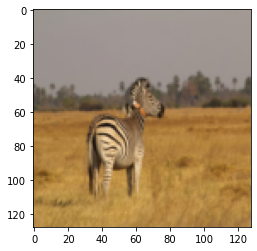

zebra


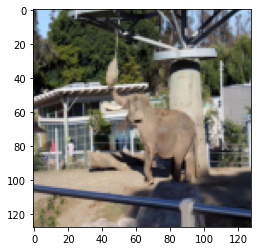

elephant


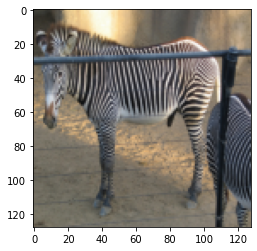

zebra


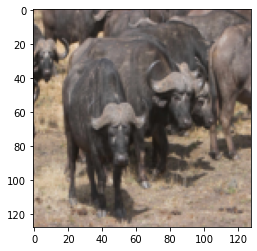

buffalo


In [19]:
for i in range(4):
  plt.imshow(X_train[i])
  plt.show()
  print(decoder[y_train[i]])

In [20]:
y_train=y_train.reshape(1052,1)
y_test=y_test.reshape(452,1)

## 4. Creating CNN Model

In [21]:
model=Sequential()

model.add(Conv2D(64,activation='relu',padding='same', strides=(1,1), kernel_size=(3,3), input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,activation='relu',padding='same', strides=(1,1), kernel_size=(3,3), input_shape=X_train[0].shape))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
dense (Dense)                (None, 128, 128, 64)      4160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 64, 64, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
epoch=10

In [25]:
hist=model.fit(X_train,y_train,batch_size=30,epochs=epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
36/36 [==============================] - 47s 1s/step - loss: 1.7062 - accuracy: 0.2792 - val_loss: 1.3192 - val_accuracy: 0.3009
Epoch 2/10
36/36 [==============================] - 45s 1s/step - loss: 1.2946 - accuracy: 0.3547 - val_loss: 1.3527 - val_accuracy: 0.2876
Epoch 3/10
36/36 [==============================] - 45s 1s/step - loss: 1.2398 - accuracy: 0.4025 - val_loss: 1.2156 - val_accuracy: 0.4270
Epoch 4/10
36/36 [==============================] - 47s 1s/step - loss: 1.1203 - accuracy: 0.5012 - val_loss: 1.0995 - val_accuracy: 0.5686
Epoch 5/10
36/36 [==============================] - 47s 1s/step - loss: 0.9842 - accuracy: 0.5889 - val_loss: 1.0331 - val_accuracy: 0.5465
Epoch 6/10
36/36 [==============================] - 50s 1s/step - loss: 0.9288 - accuracy: 0.5920 - val_loss: 0.9991 - val_accuracy: 0.6018
Epoch 7/10
36/36 [==============================] - 48s 1s/step - loss: 0.8511 - accuracy: 0.6655 - val_loss: 0.9824 - val_accuracy: 0.5996
Epoch 8/10
36/36 [==

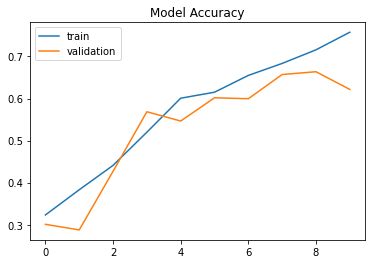

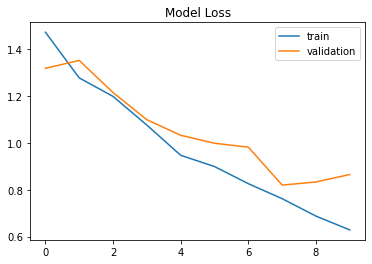

In [35]:
# Plotting the model accuracy and model loss to check for potential overfit
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()
plt.title('Model Loss')
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label='validation')
plt.legend()
plt.show()

**Conclusion**:
- The model is slightly overfitting on epoch 8 and perform less on the validation data in terms of accuracy.
- This model is performing better than other models tried from our source | it is acceptable for our use case.

In [27]:
prediction=model.predict(X_test)
type(prediction[0])

numpy.ndarray

In [28]:
tr_pred=model.predict(X_train)
y1=[]
for i in tr_pred:
  y1.append(np.argmax(i))
ts_pred=model.predict(X_test)
y2=[]
for i in ts_pred:
  y2.append(np.argmax(i))

In [29]:
min(y1),max(y1)

(0, 3)

In [30]:
for i in range(len(y1)):
  y1[i]=decoder[y1[i]]
for i in range(len(y2)):
  y2[i]=decoder[y2[i]]

In [31]:
y_train=y_train.reshape(1052)
y_test=y_test.reshape(452)

In [32]:
y_1=[]
y_2=[]
for i in range(len(y_train)):
  y_1.append(decoder[y_train[i]])
for i in range(len(y_test)):
  y_2.append(decoder[y_test[i]])

### 5. Confusion Matrix

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

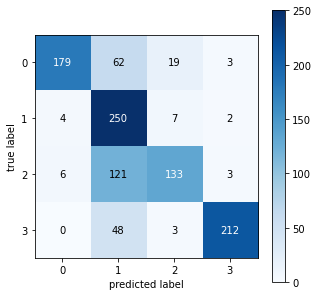

In [33]:
train_mat=confusion_matrix(y_1,y1)
plot_confusion_matrix(train_mat,figsize=(5,5),colorbar=True)

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

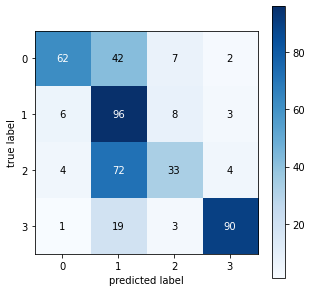

In [34]:
test_mat=confusion_matrix(y_2,y2)
plot_confusion_matrix(test_mat,figsize=(5,5),colorbar=True)

**Conclusion**
- We can see here that the buffalo class are predicted very well
- As for elephant, the model has trouble differentiating between elephant and rhino
- But, the class for rhino class, most of the predictions are correct
- Finally, the model is performing far more better on the zebra class.